In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
dfm = pd.read_csv("matches.csv")

In [19]:
# First five rows
dfm.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [20]:
# Shape of the dataset
print(dfm.shape)

(179078, 21)
(756, 18)


In [21]:
# list of all columns
print(dfm.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [23]:
# Total no of seasons
dfm['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [71]:
# Total number of wiining by each team across all the seasons
dfm.groupby(by=['winner'])['id'].count()

winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  10
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     84
Sunrisers Hyderabad             58
Name: id, dtype: int64

In [73]:
# Total number of wiining by each team across all the seasons without groupby
dfm['winner'].value_counts

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

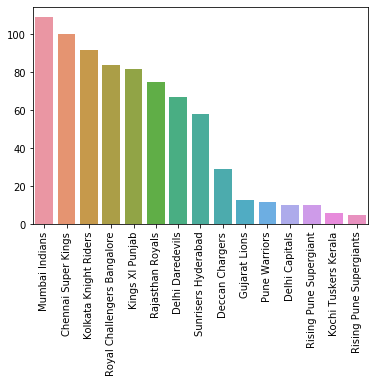

In [78]:
a =dfm['winner'].value_counts()
#dfm['winner'].value_counts().plot(kind='bar',color='r')   This is using pandas
#plt.show()

sns.barplot(x=a.index,y=a.values,data=df)   # This is using seaborn
plt.xticks(rotation=90,fontsize=10)

In [137]:
#Total Number of matches played by each team
b = dfm['team1'].value_counts() + dfm['team2'].value_counts()
b.sort_values(ascending = False)

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

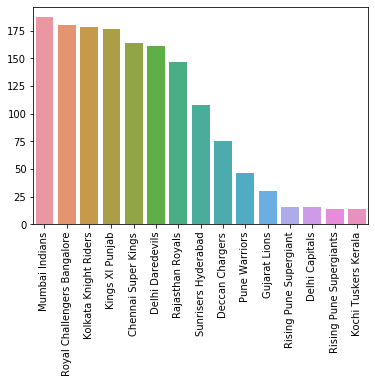

In [135]:
#Total Number of matches played by each team in bar graph
sns.barplot(x=b.index,y=b.values)
plt.xticks(rotation=90,fontsize=10)

In [140]:
# Percentage winning of each team
p_winning  = a/b *100
p_winning.sort_values(ascending = False)

Rising Pune Supergiant         62.500000
Delhi Capitals                 62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

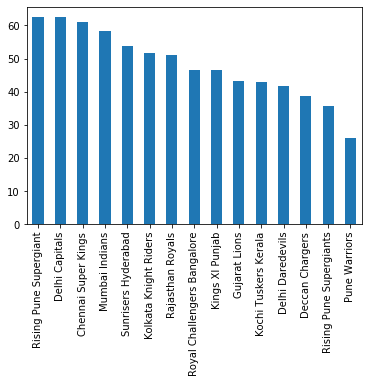

In [144]:
# Percentage winning of each team with graph
p_winning.sort_values(ascending = False).plot(kind='bar')
plt.show()

In [147]:
# Top 10 man of the match
dfm['player_of_match'].value_counts().head(20)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
V Kohli           12
AM Rahane         12
V Sehwag          11
A Mishra          11
AD Russell        11
DR Smith          11
KA Pollard        10
JH Kallis         10
AT Rayudu          9
SP Narine          9
Name: player_of_match, dtype: int64

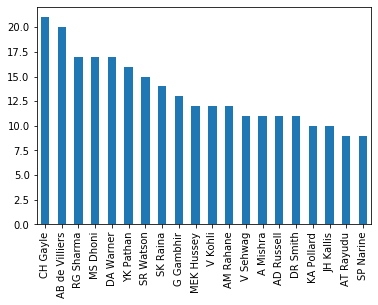

In [155]:
dfm['player_of_match'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [166]:
# Maximum win by run
dfm[dfm['win_by_runs']==dfm['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [169]:
# Maximum win by wickets
dfm[dfm['win_by_wickets']==dfm['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


In [170]:
# No of matches played in each cities
dfm['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

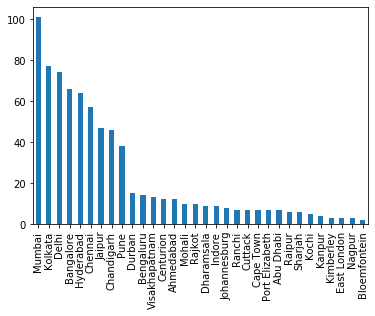

In [173]:
dfm['city'].value_counts().plot(kind='bar')
plt.show()

In [180]:
# How many matches were played in every season
dfm.groupby(by='season')['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

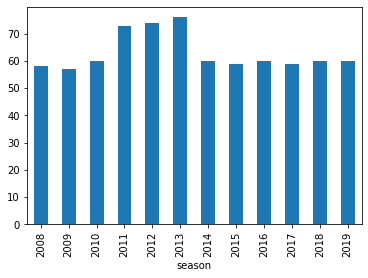

In [181]:
dfm.groupby(by='season')['id'].count().plot(kind='bar')

In [276]:
dfm.groupby(by='winner')['id'].count()

winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  10
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     84
Sunrisers Hyderabad             58
Name: id, dtype: int64

In [284]:
dfm[(dfm['winner']=='Chennai Super Kings') & (dfm['toss_winner']=='Chennai Super Kings')].count()['id']/dfm[dfm['winner']=='Chennai Super Kings']['id'].count()*100

56.99999999999999

In [289]:
dfm[(dfm['winner']=='Chennai Super Kings') & (dfm['toss_winner']!='Chennai Super Kings')].count()['id']/dfm[dfm['winner']=='Chennai Super Kings']['id'].count()*100

43.0

In [298]:
# winning percentage of each team when they win the toss

for i in dfm['winner'].unique():
    print(i,':',dfm[(dfm['winner']==i) & (dfm['toss_winner']==i)].count()['id']/dfm[dfm['winner']==i]['id'].count()*100)

Sunrisers Hyderabad : 39.6551724137931
Rising Pune Supergiant : 50.0
Kolkata Knight Riders : 57.608695652173914
Kings XI Punjab : 42.68292682926829
Royal Challengers Bangalore : 48.80952380952381
Mumbai Indians : 51.37614678899083
Delhi Daredevils : 52.23880597014925
Gujarat Lions : 76.92307692307693
Chennai Super Kings : 56.99999999999999
Rajasthan Royals : 56.00000000000001
Deccan Chargers : 65.51724137931035
Pune Warriors : 25.0
Kochi Tuskers Kerala : 66.66666666666666
nan : nan
Rising Pune Supergiants : 60.0
Delhi Capitals : 70.0


C:\Users\Hemant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


In [300]:
# winning percentage of each team when they lose the toss

for i in dfm['winner'].unique():
    print(i,':',dfm[(dfm['winner']==i) & (dfm['toss_winner']!=i)].count()['id']/dfm[dfm['winner']==i]['id'].count()*100)

Sunrisers Hyderabad : 60.3448275862069
Rising Pune Supergiant : 50.0
Kolkata Knight Riders : 42.391304347826086
Kings XI Punjab : 57.3170731707317
Royal Challengers Bangalore : 51.19047619047619
Mumbai Indians : 48.62385321100918
Delhi Daredevils : 47.76119402985074
Gujarat Lions : 23.076923076923077
Chennai Super Kings : 43.0
Rajasthan Royals : 44.0
Deccan Chargers : 34.48275862068966
Pune Warriors : 75.0
Kochi Tuskers Kerala : 33.33333333333333
nan : nan
Rising Pune Supergiants : 40.0
Delhi Capitals : 30.0


C:\Users\Hemant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


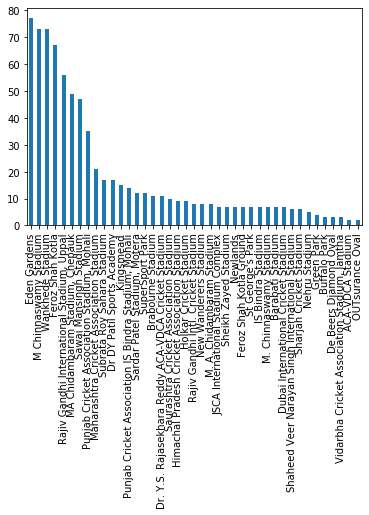

In [408]:
# Matches played in stadiums
dfm['venue'].value_counts().plot(kind='bar')

# Mumbai vs CSK

In [309]:
mvc =dfm[((dfm['team1']=='Chennai Super Kings') & (dfm['team2']=='Mumbai Indians')) | ((dfm['team1']=='Mumbai Indians') & (dfm['team2']=='Chennai Super Kings'))]

In [341]:
mvc

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN
210,211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper,NaN
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
256,257,2011,Mumbai,2011-04-22,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,NaN
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
354,355,2012,Mumbai,2012-05-06,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,NaN


In [339]:
mvc['winner'].value_counts()

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

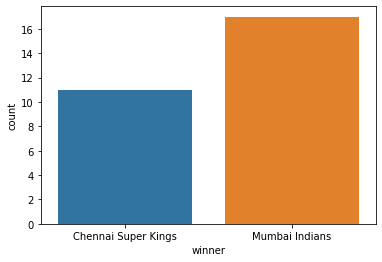

In [344]:
sns.countplot(mvc['winner'])

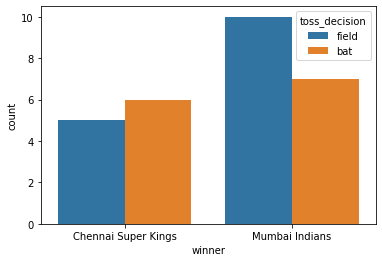

In [350]:
sns.countplot(mvc['winner'],hue=mvc['toss_decision'])

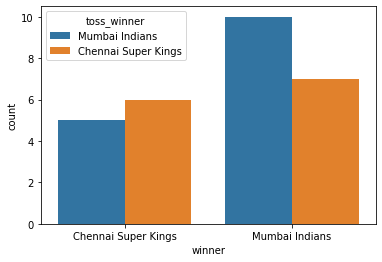

In [351]:
sns.countplot(mvc['winner'],hue=mvc['toss_winner'])

In [358]:
mvc.groupby(by=['venue','winner'])['id'].count()

venue                                    winner             
Brabourne Stadium                        Chennai Super Kings    1
                                         Mumbai Indians         1
Dr DY Patil Sports Academy               Chennai Super Kings    1
Dubai International Cricket Stadium      Chennai Super Kings    1
Eden Gardens                             Mumbai Indians         2
Feroz Shah Kotla                         Chennai Super Kings    1
M Chinnaswamy Stadium                    Chennai Super Kings    1
M. A. Chidambaram Stadium                Mumbai Indians         2
MA Chidambaram Stadium, Chepauk          Chennai Super Kings    2
                                         Mumbai Indians         3
Maharashtra Cricket Association Stadium  Mumbai Indians         1
Newlands                                 Mumbai Indians         1
Rajiv Gandhi Intl. Cricket Stadium       Mumbai Indians         1
St George's Park                         Chennai Super Kings    1
Wankhede Stadiu

In [389]:
# total wins per session per teams
for i in dfm['season'].unique():
    print(i,"\n")
    print(dfm[dfm['season']==i]['winner'].value_counts())

2017 

Mumbai Indians                 12
Rising Pune Supergiant         10
Kolkata Knight Riders           9
Sunrisers Hyderabad             8
Kings XI Punjab                 7
Delhi Daredevils                6
Gujarat Lions                   4
Royal Challengers Bangalore     3
Name: winner, dtype: int64
2008 

Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Delhi Daredevils                7
Mumbai Indians                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Deccan Chargers                 2
Name: winner, dtype: int64
2009 

Delhi Daredevils               10
Deccan Chargers                 9
Royal Challengers Bangalore     9
Chennai Super Kings             8
Kings XI Punjab                 7
Rajasthan Royals                6
Mumbai Indians                  5
Kolkata Knight Riders           3
Name: winner, dtype: int64
2010 

Mumbai Indians                 11
Chennai Super Kings             9
Deccan 

Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Delhi Daredevils                7
Mumbai Indians                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Deccan Chargers                 2
Name: winner, dtype: int64

In [391]:
dfm.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [395]:
# Most no of umpiring
dfm['umpire1'].value_counts().head(10)

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
BF Bowden          37
BR Doctrove        34
M Erasmus          32
Nitin Menon        20
RE Koertzen        20
Name: umpire1, dtype: int64

 # Q1: What is the win percentage of a team batting second at Wankhede Stadium during 2008 to 2019?

In [494]:
o = dfm[(dfm['venue']=='Wankhede Stadium') & (dfm['toss_decision']=='field')]

In [502]:
o


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
27,28,2017,Mumbai,2017-04-24,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
49,50,2017,Mumbai,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore,NaN
55,56,2017,Mumbai,2017-05-16,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,20,0,Washington Sundar,Wankhede Stadium,S Ravi,C Shamshuddin,NaN
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
98,99,2008,Mumbai,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper,NaN
105,106,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar,NaN


In [504]:
ans = o[o['win_by_wickets']>0]['id'].count()/o['id'].count()*100


In [505]:
print("What is the win percentage of a team batting second at Wankhede Stadium during 2008 to 2019",ans)

What is the win percentage of a team batting second at Wankhede Stadium during 2008 to 2019 50.98039215686274


In [506]:
dfm['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

In [507]:
dfm[dfm['dl_applied']==1]['winner'].value_counts()

Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Rising Pune Supergiants        2
Delhi Daredevils               2
Chennai Super Kings            2
Kings XI Punjab                2
Sunrisers Hyderabad            2
Kochi Tuskers Kerala           1
Rajasthan Royals               1
Name: winner, dtype: int64

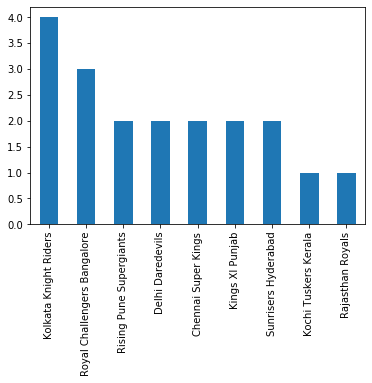

In [508]:
dfm[dfm['dl_applied']==1]['winner'].value_counts().plot(kind='bar')